# Waste generation and recycling: An overview in Europe.

This project aims to understand the waste generation and recycling scene in European countires and their evolution overtime.

The datasets used for the analysis are the following:
*   Waste generation dataset: Waste generation for all types of waste excluding major mineral waste. Information available for 38 countries. In kilogram per capita .For periods of two years from 2004 to 2020. Source:  Eurostats
*   Watse recycling dataset: Waste recycling for all types of waste excluding major mineral waste. Information available for 32 countries. In kilogram per capita .For periods of two years from 2004 to 2020. Source:  Eurostats,
*   Recycling facilities dataset: Number of recycling facilities in european countries. Information available for 28 countries for periods of two years from 2010 to 2020. Source: Eurostats

## Research questions:


1.   What are the geographical and time trends for waste generation and recycling in Europe? What is behind them? (Using Tableau, workbook included)

2.   What groups do the different countries cluster form based on waste generation and recycling? What are the similarities/differences in their trends?





## Data loading and cleaning

The cleaning included two main steps:


*   Detecting outliers: any value which was greater than 1.5 std from the mean was considered an outlier. (per country, per dataset)
*   Imputing missing values: multivariate feature imputation where  models each feature with missing values as a function of other features, and uses that estimate for imputation. It takes into account the most similar nighbors (neighbors = 2).



In [ ]:
## importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from google.colab import files
from scipy import stats
import numpy as np
uploaded = files.upload()
import io


Saving wasteall.xlsx to wasteall.xlsx


In [ ]:
## loading dataset
df_waste = pd.read_excel(io.BytesIO(uploaded[r'wasteall.xlsx']))

In [ ]:
## replacing missing values , expressed as ':' with nans
df_waste.replace(':', None, inplace=True)

In [ ]:
##renaming columns and setting country names as index
df_waste.columns = ['country', '2010_rec', '2012_rec', '2014_rec', '2016_rec',
       '2018_rec', '2020_rec', '2010_gen', '2012_gen', '2014_gen', '2016_gen',
       '2018_gen', '2020_gen', '2010_fac', '2012_fac', '2014_fac', '2016_fac',
       '2018_fac', '2020_fac']
df_waste.set_index('country', inplace=True)

In [ ]:
## taking a look at the dataframe structure
df_waste.head()

,2010_rec,2012_rec,2014_rec,2016_rec,2018_rec,2020_rec,2010_gen,2012_gen,2014_gen,2016_gen,2018_gen,2020_gen,2010_fac,2012_fac,2014_fac,2016_fac,2018_fac,2020_fac
country,,,,,,,,,,,,,,,,,,
Austria,719,917,915,1099,935,932,5299,5385,6254,6729,7153,7466,1162,1109,1142,1157,1634,1642
Belgium,2051,2672,2784,2679,3131,3200,5355,4621,4873,5226,5622,5499,551,578,586,572,955,857
Bulgaria,297,322,392,547,484,None,22622,22013,24759,16748,18392,16536,593,None,610,626,752,752
Croatia,166,191,312,393,454,496,774,837,858,1252,1305,1408,173,123,144,195,196,260
Cyprus,565,310,262,266,311,396,2843,2153,2302,2881,2536,2366,100,112,94,20,20,29


In [ ]:
## dimesnion of the dataset
df_waste.shape

(28, 18)

In [ ]:
## splitting the dataset into generation, recycling, and facilities subdatasets
df_rec = df_waste.iloc[:,range(0,6)]
df_gen = df_waste.iloc[:,range(6,12)]
df_fac = df_waste.iloc[:,range(12,18)]

In [ ]:
## insuring that datattypes are all numerical.
df_rec = df_rec.apply(pd.to_numeric)
df_gen = df_gen.apply(pd.to_numeric)
df_fac = df_fac.apply(pd.to_numeric)

In [ ]:
## detecting outliers and replacing them with nan
df_fac = df_fac.mask(df_fac.sub(df_fac.mean()).div(df_fac.std()).abs().gt(2))
df_rec = df_rec.mask(df_rec.sub(df_rec.mean()).div(df_rec.std()).abs().gt(2))
df_gen = df_gen.mask(df_gen.sub(df_gen.mean()).div(df_gen.std()).abs().gt(2))

In [ ]:
## caluclating the number of outliers and missing values
df_waste.isna().sum().sum()

26

In [ ]:
## imputing missing values for waste generation dataset
imp = IterativeImputer(n_nearest_features= 3, random_state=0,min_value=0)
df_waste_imp_gen = imp.fit_transform(df_gen)
df_waste_imp_gen = pd.DataFrame(df_waste_imp_gen, columns = df_gen.columns, index= df_gen.index)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
## imputing missing values for waste recycling dataset
imp = IterativeImputer(n_nearest_features= 3, random_state=0,min_value=0)
df_waste_imp_fac = imp.fit_transform(df_fac)
df_waste_imp_fac = pd.DataFrame(df_waste_imp_fac, columns = df_fac.columns, index= df_fac.index)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
## imputing missing values for recycling facilities number dataset
imp = IterativeImputer(n_nearest_features= 3, random_state=0,min_value=0)
df_waste_imp_rec = imp.fit_transform(df_rec)
df_waste_imp_rec = pd.DataFrame(df_waste_imp_rec, columns = df_rec.columns, index= df_rec.index)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
## joining the three datasets and downoading them
df_waste_imp_all = df_waste_imp_gen.join(df_waste_imp_rec).join(df_waste_imp_fac)
from google.colab import files
df_waste_imp_all.to_excel('wasteall_imp.xlsx')
files.download('wasteall_imp.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Clustering:
We perofrmed clustering of the countries based on waste generation and waste recycling seperately.
We used two methods of clustering:


1.   Correlation and clustermaps: masking insignificant values (p-value>0.05).
2.   K-nearest neighbors: unsupervised clustering into 3 groups (determined by the elbow method and Inertia). As it is the optimum ML clustering algorithm for small datasets.

Inertia: a measure of how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters



### Waste generation - cluster maps:
3 main clusters are observed based on waste generation


1.   Cluster 1: alternating periods of increase and decrease in waste generation.
2.   Cluster 2: A steady high increase in waste generation over the years.
3.   Cluster 3:  increase in waste generation from 2010-2018 and then slight decrease.

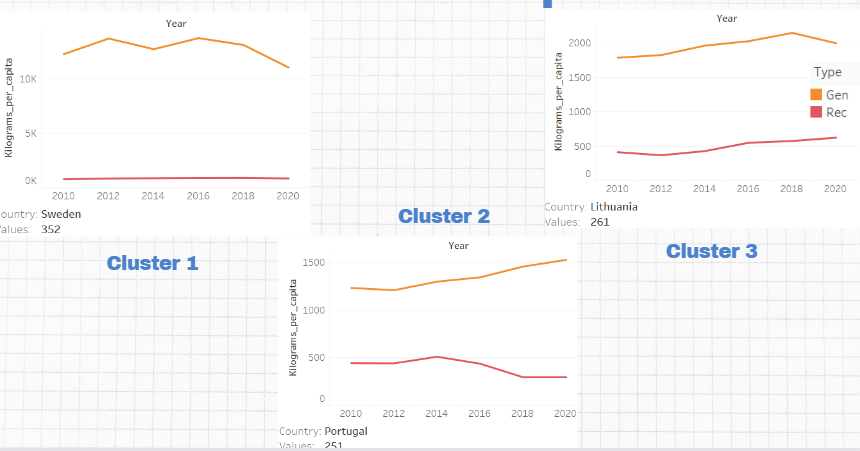


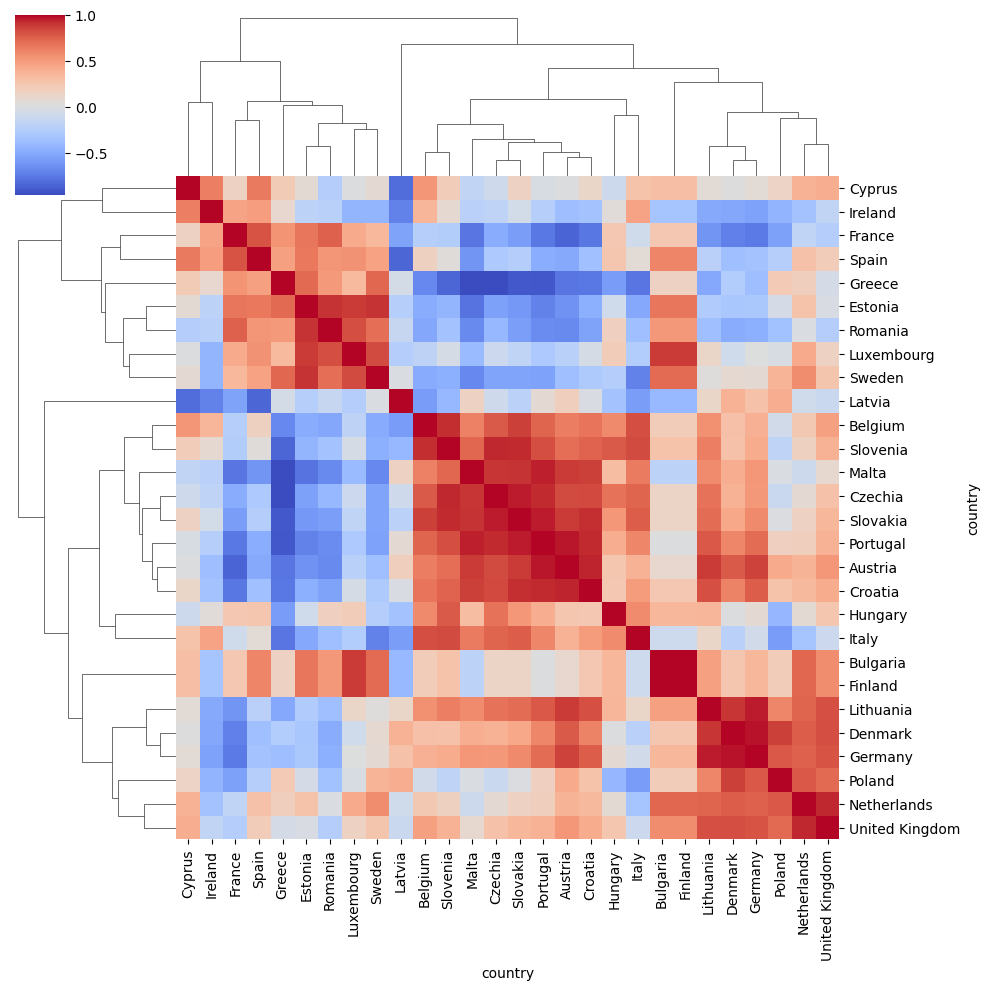

In [ ]:
## cluster map based on correlations for waste generation subdataset
df_gen_cor = pd.DataFrame(df_waste_imp_gen.transpose()).astype(float).corr()
sns.clustermap(df_gen_cor,  cmap= 'coolwarm',xticklabels=True)
plt.show()

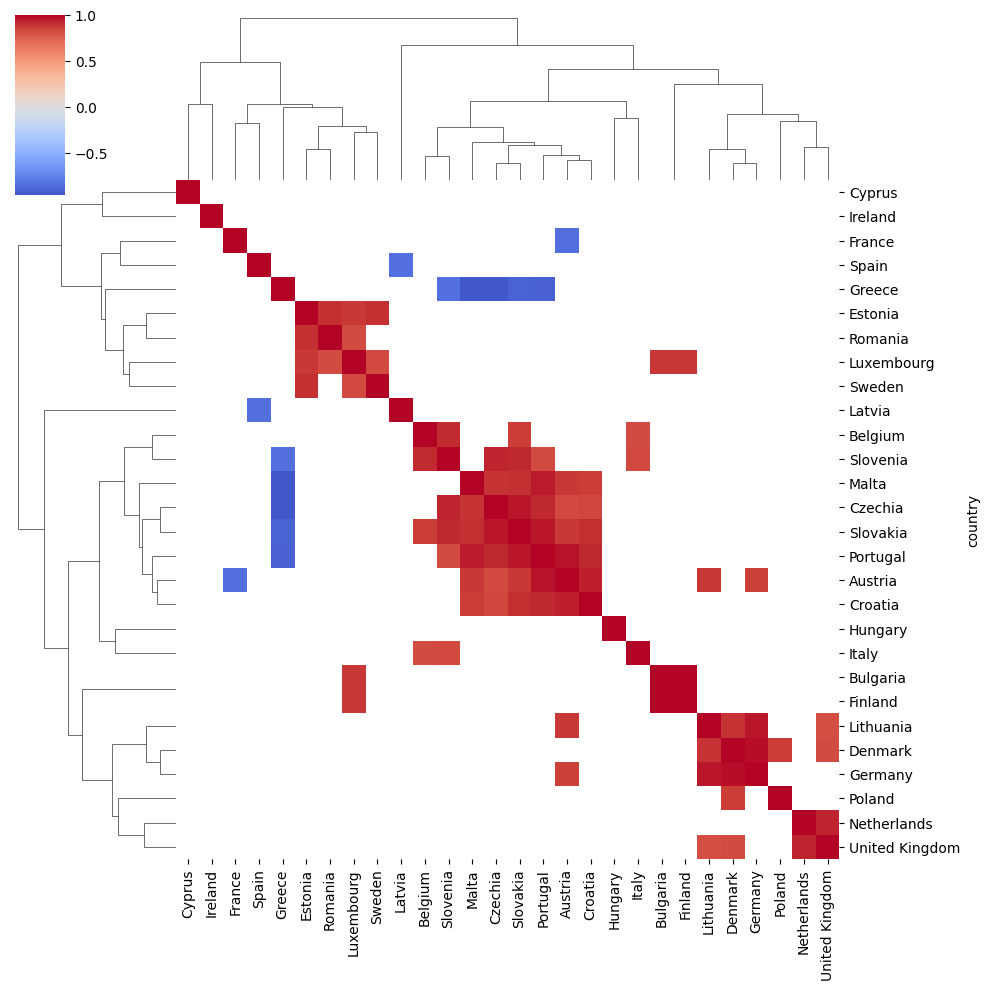

In [ ]:
## cluster map based on correlations for waste generation subdataset masking insignificant values (p-value>0.05)
countries = df_waste_imp_gen.T.columns.copy()
coesp = pd.DataFrame(index=countries)
pvalsp = pd.DataFrame(index=countries)
for cou in countries:
    coe = []
    pval = []
    for cou2 in countries:
        coef, p = stats.pearsonr(df_waste_imp_gen.T[cou],df_waste_imp_gen.T[cou2])
        coe.append(coef)
        pval.append(p)
    coesp[cou] = coe
    pvalsp[cou] = pval


##making a lmask for insignifcant values
pvalsin = pvalsp.where(pvalsp<=0.05, np.nan)
##Clustermap
sns.clustermap(coesp,  cmap= 'coolwarm', mask = pvalsin.isnull(),center=0.0,yticklabels=True,xticklabels=True)
plt.show()


### Waste recycling - cluster maps:
4 main clusters are observed based on waste generation


1.   Cluster 1: steady recycling rate with a small drop at 2014.
2.   Cluster 2: steady recycling rate.
3.   Cluster 3:  increase in waste recycling over the time period.
4.   Cluster 4: steady recycling with a slight drop at 2016.

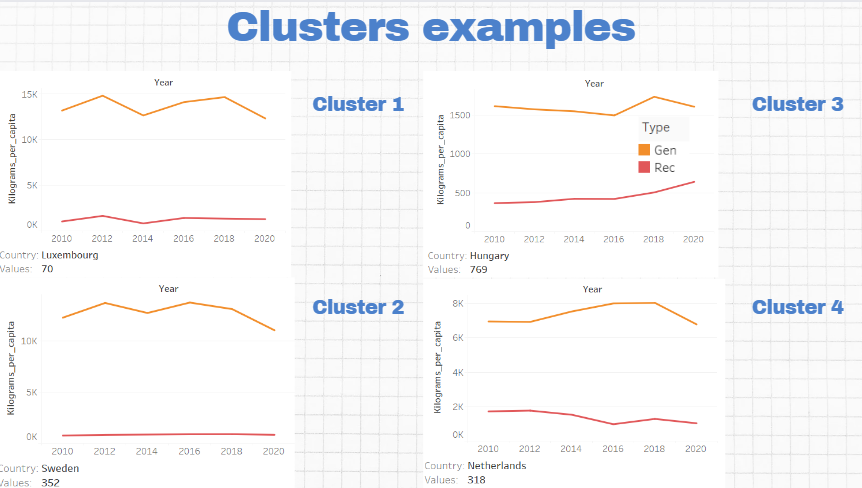

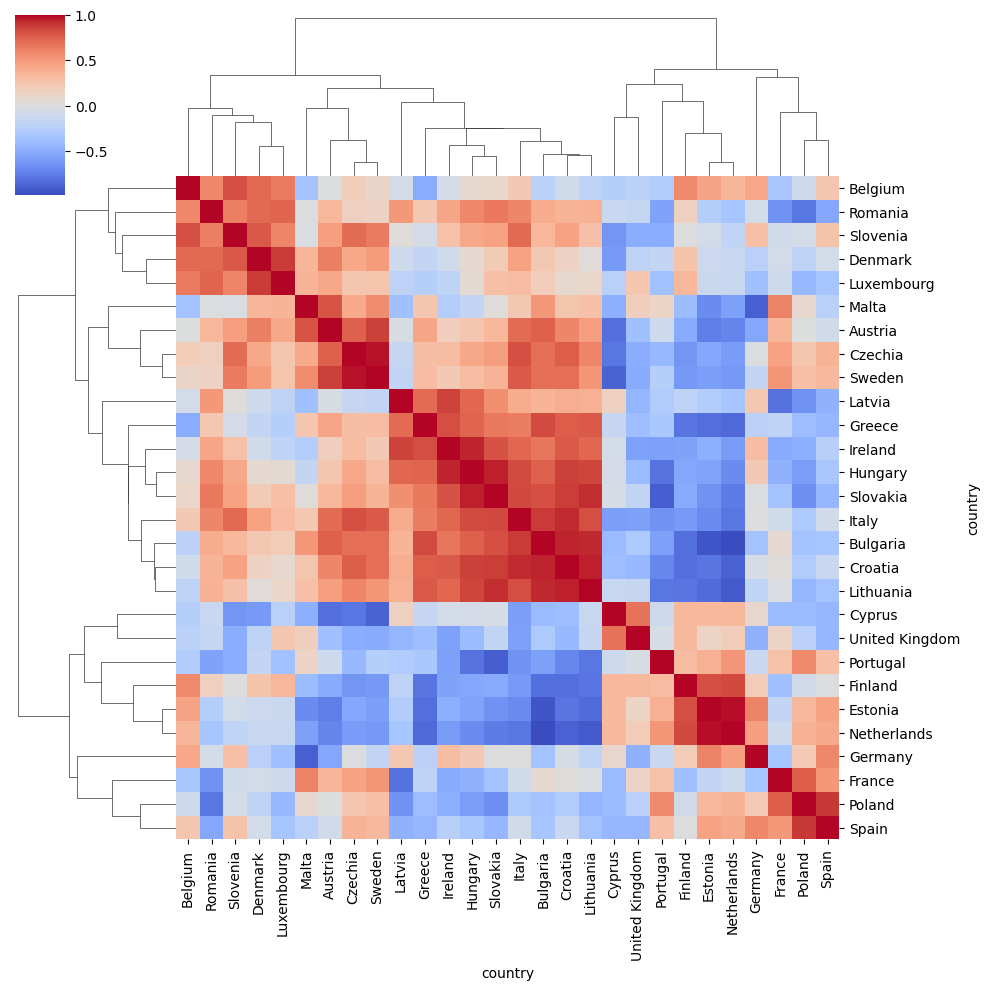

In [ ]:
## cluster map based on correlations for waste recycling subdataset
df_rec_cor = pd.DataFrame(df_waste_imp_rec.transpose()).astype(float).corr()
sns.clustermap(df_rec_cor,  cmap= 'coolwarm',xticklabels=True)
plt.show()

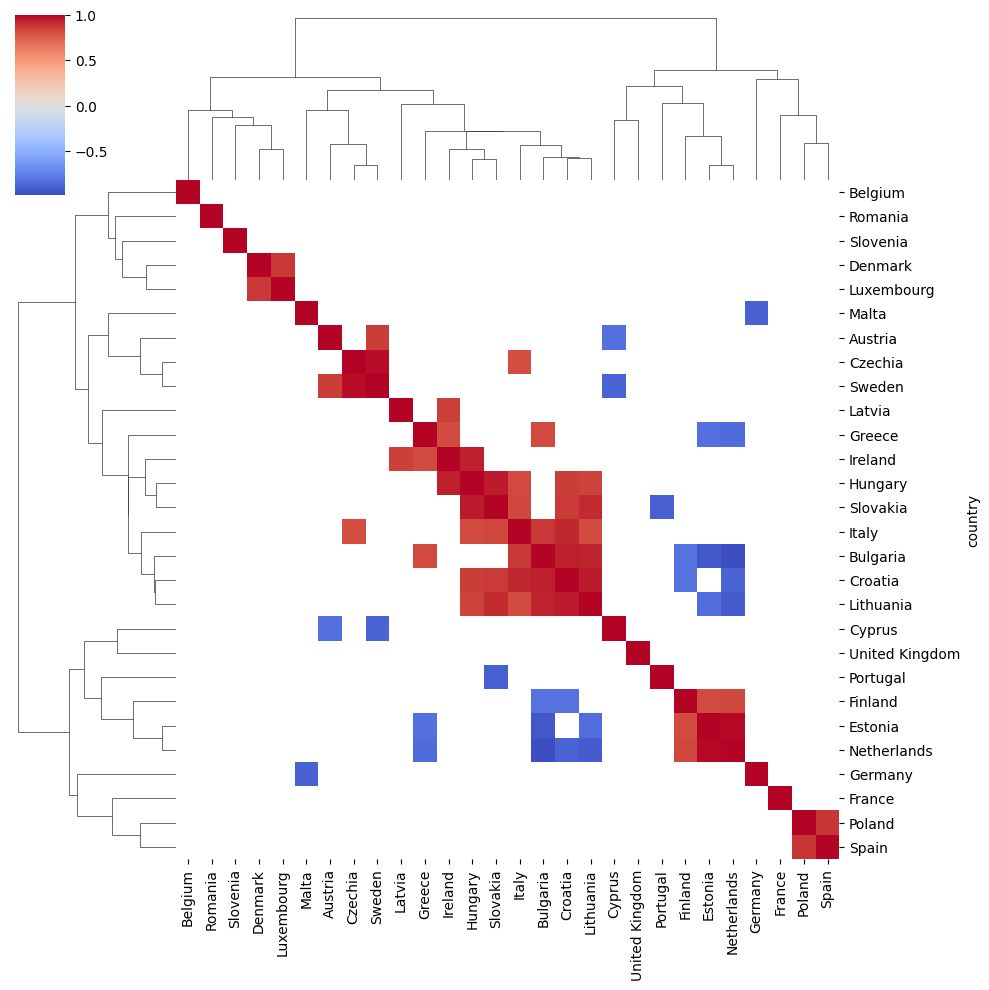

In [ ]:
## cluster map based on correlations for waste recycling subdataset masking insignificant values (p-value>0.05)
countries = df_waste_imp_rec.T.columns.copy()
coesp = pd.DataFrame(index=countries)
pvalsp = pd.DataFrame(index=countries)
for cou in countries:
    coe = []
    pval = []
    for cou2 in countries:
        coef, p = stats.pearsonr(df_waste_imp_rec.T[cou],df_waste_imp_rec.T[cou2])
        coe.append(coef)
        pval.append(p)
    coesp[cou] = coe
    pvalsp[cou] = pval


##making a lmask for insignifcant values
pvalsin = pvalsp.where(pvalsp<=0.05, np.nan)
##Clustermap
sns.clustermap(coesp,  cmap= 'coolwarm', mask = pvalsin.isnull(),center=0.0,yticklabels=True,xticklabels=True)
plt.show()

### Waste generation - KNN:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

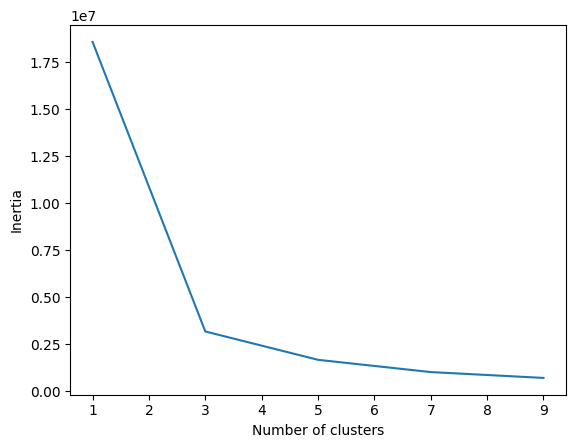

In [ ]:
## elbow method for the optimum number of of k-nearest neighbors based on generation subdataset
wcss = []
for i in range(1, 11, 2):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_waste_imp_rec)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11,2), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
## countries grouping using knn (k=3) nased on waste generation trends
km3 = KMeans(n_clusters=3, random_state=42).fit(df_waste_imp_rec)
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_waste.iloc[:,range(0,12)].index.values
cluster_map['cluster'] = km3.labels_
cluster_map.sort_values(by=['cluster'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,data_index,cluster
0,Austria,0
25,Slovenia,0
21,Poland,0
15,Italy,0
27,Sweden,0
11,Germany,0
10,France,0
8,European Union - 27 countries (from 2020),0
28,United Kingdom,0
6,Denmark,0


### Waste recycling - KNN:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

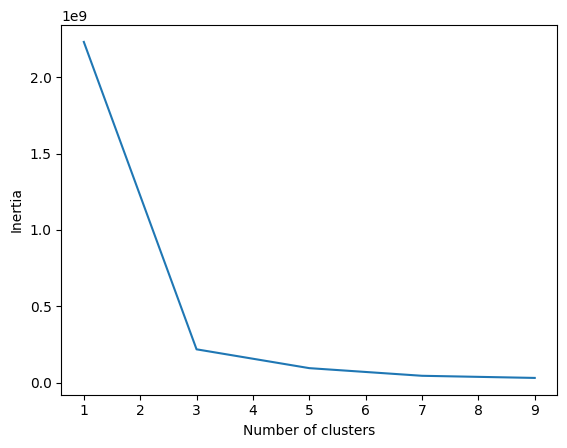

In [ ]:
## elbow method for the optimum number of of k-nearest neighbors based on recycling subdataset
wcss = []
for i in range(1, 11, 2):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_waste_imp_gen)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11,2), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
## countries grouping using knn (k=3) nased on waste recycling trends
km3 = KMeans(n_clusters=3, random_state=42).fit(df_waste_imp_gen)
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_waste.iloc[:,range(0,12)].index.values
cluster_map['cluster'] = km3.labels_
cluster_map.sort_values(by=['cluster'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,data_index,cluster
14,Ireland,0
26,Spain,0
25,Slovenia,0
3,Croatia,0
4,Cyprus,0
5,Czechia,0
6,Denmark,0
16,Latvia,0
24,Slovakia,0
17,Lithuania,0


## Limitations:

* No clear characteristics for the KNN clusters.
* Not enough data to asses the KNN model
* Few data points
* Missing data and errors in collecting the data.